In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib widget
import matplotlib.pyplot as plt
import optuna as op
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as ss, LabelEncoder as labe
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from IPython.display import clear_output, display

2024-12-14 19:30:39.209093: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-14 19:30:39.403296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734201039.478351    1825 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734201039.503734    1825 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 19:30:39.704013: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/250


/SI/si/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-14 19:30:51.977850: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3378 - loss: 0.9273 - val_accuracy: 0.6104 - val_loss: 0.6693
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6873 - loss: 0.6308 - val_accuracy: 0.7273 - val_loss: 0.5847
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 0.5676 - val_accuracy: 0.7208 - val_loss: 0.5621
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.5674 - val_accuracy: 0.7403 - val_loss: 0.5600
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6872 - loss: 0.5958 - val_accuracy: 0.7338 - val_loss: 0.5514
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7185 - loss: 0.5467 - val_accuracy: 0.7273 - val_loss: 0.5505
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7064 - loss: 0.5730 - val_accuracy: 0.7143 - val_loss: 0.5503
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7327 - loss: 0.5328 - val_accuracy: 0.7143 - val_loss: 0.5

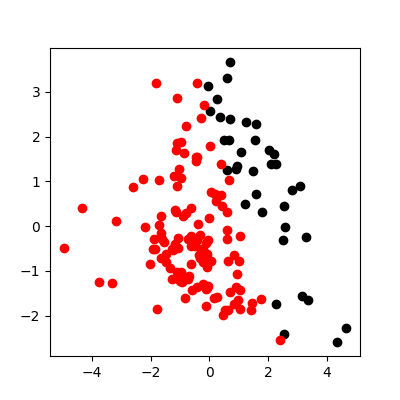

In [ ]:
data = pd.read_csv("diabetes.csv")
data.dropna(inplace=True)
X = data.to_numpy()[:,0:8]
y = data.to_numpy()[:,8]

X = ss().fit_transform(X)

X = PCA(n_components=2, random_state=86).fit_transform(X)

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=250, validation_data=[X_test, y_test])

y_pred = model.predict(X_test)

temp3=X_test[y_pred[:,0]>=0.5]
temp4=X_test[y_pred[:,0]<0.5]

accuracy = accuracy_score(y_test, y_pred.round())

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}\nAccuracy: {accuracy}')
fig = plt.figure(figsize=(4,4))

fig.add_subplot(1,1,1)
plt.scatter(temp3[:,0], temp3[:,1],  color='black') #plot scatters
plt.scatter(temp4[:,0], temp4[:,1],  color='red') #plot scatters

Epoch 1/250


/SI/si/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6616 - loss: 0.6576 - val_accuracy: 0.6299 - val_loss: 0.5978
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7066 - loss: 0.5632 - val_accuracy: 0.7013 - val_loss: 0.5548
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7031 - loss: 0.5695 - val_accuracy: 0.7013 - val_loss: 0.5401
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7258 - loss: 0.5292 - val_accuracy: 0.7143 - val_loss: 0.5362
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7468 - loss: 0.5242 - val_accuracy: 0.7208 - val_loss: 0.5280
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7167 - loss: 0.5532 - val_accuracy: 0.7273 - val_loss: 0.5296
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7131 - loss: 0.5503 - val_accuracy: 0.7338 - val_loss: 0.5288
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7213 - loss: 0.5539 - val_accuracy: 0.7338 - val_loss: 0.5

TypeError: scatter() got multiple values for argument 's'

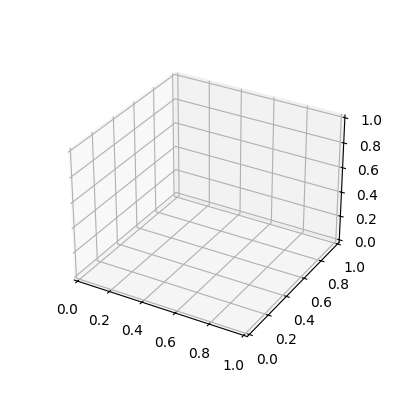

In [3]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("diabetes.csv")
data.dropna(inplace=True)
X = data.to_numpy()[:,0:8]
y = data.to_numpy()[:,8]

X = ss().fit_transform(X)

X = PCA(n_components=3, random_state=86).fit_transform(X)

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=250, validation_data=[X_test, y_test])

y_pred = model.predict(X_test)

temp3=X_test[y_pred[:,0]>=0.5]
temp4=X_test[y_pred[:,0]<0.5]

accuracy = accuracy_score(y_test, y_pred.round())

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}\nAccuracy: {accuracy}')
fig = plt.figure(figsize=(4,4))

fig.add_subplot(1,1,1, projection="3d")
plt.scatter(temp3[:,0], temp3[:,1], color='black') #plot scatters
plt.scatter(temp4[:,0], temp4[:,1], color='red') #plot scatters

Epoch 1/400


/SI/si/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6139 - loss: 0.6634 - val_accuracy: 0.7775 - val_loss: 0.5655
Epoch 2/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7334 - loss: 0.5890 - val_accuracy: 0.7775 - val_loss: 0.5454
Epoch 3/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7306 - loss: 0.5830 - val_accuracy: 0.7775 - val_loss: 0.5438
Epoch 4/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7236 - loss: 0.5844 - val_accuracy: 0.7775 - val_loss: 0.5418
Epoch 5/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7269 - loss: 0.5820 - val_accuracy: 0.7775 - val_loss: 0.5399
Epoch 6/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.5664 - val_accuracy: 0.7775 - val_loss: 0.5398
Epoch 7/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: 0.5823 - val_accuracy: 0.7775 - val_loss: 0.5420
Epoch 8/400
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7412 - loss: 0.5692 - val_accuracy: 0.7775 - val_loss: 0.5

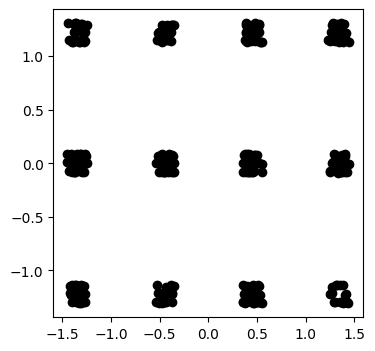

In [30]:
data = pd.read_csv("../car.data", names=["cena", "utrzymanie", "n_drzwi", "n_osoby", "poj", "bezp", "ocena"])
le = labe()
le.fit(data["cena"].astype('category'))
data['cena']=le.transform(data['cena'])
le.fit(data["utrzymanie"].astype('category'))
data['utrzymanie']=le.transform(data['utrzymanie'])
le.fit(data["n_drzwi"].astype('category'))
data['n_drzwi']=le.transform(data['n_drzwi'])
le.fit(data["n_osoby"].astype('category'))
data['n_osoby']=le.transform(data['n_osoby'])
le.fit(data["poj"].astype('category'))
data['poj']=le.transform(data['poj'])
le.fit(data["bezp"].astype('category'))
data['bezp']=le.transform(data['bezp'])
le.fit(data["ocena"].astype('category'))
data['ocena']=le.transform(data['ocena'])
data['ocena'] = data['ocena'].replace(1, 0)
data['ocena'] = data['ocena'].replace(2, 1)
data['ocena'] = data['ocena'].replace(3, 1)
X = data.to_numpy()[:,0:6]
y = data.to_numpy()[:,6]

X = ss().fit_transform(X)

X = PCA(n_components=2, random_state=86).fit_transform(X)

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=400, validation_data=[X_test, y_test])

y_pred = model.predict(X_test)

# temp = [x[0] for x in X_test]
# temp_y = [x[0] for x in y_pred]
# temp2 = np.array([temp, temp_y]).T
temp3=X_test[y_pred[:,0]>=0.5]
temp4=X_test[y_pred[:,0]<0.5]

accuracy = accuracy_score(y_test, y_pred.round())

#loss, accuracy = model.evaluate(X_test, y_test)

#print(f'Loss: {loss}\nAccuracy: {accuracy}')
fig = plt.figure(figsize=(4,4))

fig.add_subplot(1,1,1)
plt.scatter(temp3[:,0], temp3[:,1],  color='black') #plot scatters
plt.scatter(temp4[:,0], temp4[:,1],  color='red') #plot scatters

In [4]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

def objective(trial):
    #l_r=0.1
    l_r = trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.001, 0.001, 0.0001])
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'SGD', 'Adagrad'])
    loss = trial.suggest_categorical('loss', ['binary_crossentropy', 'categorical_crossentropy', 'sparse_categorical_crossentropy'])
    epochs = trial.suggest_int("epochs", 50, 300, 50)

    model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

    if optimizer=="Adam":
        model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])
    
    if optimizer=='RMSprop':
        model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])
    
    if optimizer=='SGD':
        model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])
    
    if optimizer=='Adagrad':
        model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])

    loss, accuracy = model.evaluate(X_test, y_test)

    return accuracy

study = op.create_study(direction='maximize')

study.optimize(objective, n_trials=20)
clear_output()

print(f'Najlepsze hiperparametry: {study.best_params}')
print(f'Najlepszy wynik dokładności: {study.best_value}')


[I 2024-12-10 15:09:01,479] A new study created in memory with name: no-name-2715f52b-0972-4bec-bd55-1b8056b04d9b
/tmp/ipykernel_550/962001718.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  epochs = trial.suggest_int("epochs", 50, 300, 50)
/SI/si/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6649 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6541 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6464 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6582 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6818 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6849 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6541 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 9/200
20/20 ━━━━━━━━━━━━━

[I 2024-12-10 15:09:35,768] Trial 0 finished with value: 0.6428571343421936 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adagrad', 'loss': 'sparse_categorical_crossentropy', 'epochs': 200}. Best is trial 0 with value: 0.6428571343421936.


Epoch 1/250


/SI/si/lib/python3.11/site-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3034 - loss: 0.0000e+00 - val_accuracy: 0.3442 - val_loss: 0.0000e+00
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3552 - loss: 0.0000e+00 - val_accuracy: 0.3831 - val_loss: 0.0000e+00
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3614 - loss: 0.0000e+00 - val_accuracy: 0.4156 - val_loss: 0.0000e+00
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4355 - loss: 0.0000e+00 - val_accuracy: 0.4805 - val_loss: 0.0000e+00
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4364 - loss: 0.0000e+00 - val_accuracy: 0.5455 - val_loss: 0.0000e+00
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4810 - loss: 0.0000e+00 - val_accuracy: 0.5649 - val_loss: 0.0000e+00
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5030 - loss: 0.0000e+00 - val_accuracy: 0.5844 - val_loss: 0.0000e+00
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5

[I 2024-12-10 15:10:18,214] Trial 1 finished with value: 0.701298713684082 and parameters: {'learning_rate': 0.01, 'optimizer': 'SGD', 'loss': 'categorical_crossentropy', 'epochs': 250}. Best is trial 1 with value: 0.701298713684082.


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3847 - loss: 0.0000e+00 - val_accuracy: 0.3571 - val_loss: 0.0000e+00
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3925 - loss: 0.0000e+00 - val_accuracy: 0.3571 - val_loss: 0.0000e+00
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3818 - loss: 0.0000e+00 - val_accuracy: 0.3571 - val_loss: 0.0000e+00
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4188 - loss: 0.0000e+00 - val_accuracy: 0.3636 - val_loss: 0.0000e+00
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3931 - loss: 0.0000e+00 - val_accuracy: 0.3636 - val_loss: 0.0000e+00
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3842 - loss: 0.0000e+00 - val_accuracy: 0.3636 - val_loss: 0.0000e+00
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4154 - loss: 0.0000e+00 - val_accuracy: 0.3636 - val_loss: 0.0000e+00
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

[I 2024-12-10 15:10:51,961] Trial 2 finished with value: 0.3961038887500763 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adagrad', 'loss': 'categorical_crossentropy', 'epochs': 200}. Best is trial 1 with value: 0.701298713684082.


Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5778 - loss: 0.0000e+00 - val_accuracy: 0.5584 - val_loss: 0.0000e+00
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5622 - loss: 0.0000e+00 - val_accuracy: 0.5974 - val_loss: 0.0000e+00
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5988 - loss: 0.0000e+00 - val_accuracy: 0.6299 - val_loss: 0.0000e+00
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6155 - loss: 0.0000e+00 - val_accuracy: 0.6558 - val_loss: 0.0000e+00
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6535 - loss: 0.0000e+00 - val_accuracy: 0.6623 - val_loss: 0.0000e+00
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6444 - loss: 0.0000e+00 - val_accuracy: 0.6688 - val_loss: 0.0000e+00
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6886 - loss: 0.0000e+00 - val_accuracy: 0.6753 - val_loss: 0.0000e+00
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - a

[I 2024-12-10 15:11:17,455] Trial 3 finished with value: 0.7077922224998474 and parameters: {'learning_rate': 0.01, 'optimizer': 'SGD', 'loss': 'categorical_crossentropy', 'epochs': 150}. Best is trial 3 with value: 0.7077922224998474.


Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4464 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4370 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4540 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4371 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4449 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4438 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4458 - loss: 0.0000e+00 - val_accuracy: 0.4091 - val_loss: 0.0000e+00
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

[I 2024-12-10 15:11:47,813] Trial 4 finished with value: 0.551948070526123 and parameters: {'learning_rate': 0.0001, 'optimizer': 'Adam', 'loss': 'categorical_crossentropy', 'epochs': 150}. Best is trial 3 with value: 0.7077922224998474.


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4417 - loss: 1.0816 - val_accuracy: 0.6169 - val_loss: 0.6779
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6437 - loss: 0.6348 - val_accuracy: 0.7403 - val_loss: 0.5466
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7126 - loss: 0.5567 - val_accuracy: 0.7143 - val_loss: 0.5277
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7195 - loss: 0.5460 - val_accuracy: 0.7078 - val_loss: 0.5243
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7661 - loss: 0.4956 - val_accuracy: 0.7273 - val_loss: 0.5271
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7473 - loss: 0.5258 - val_accuracy: 0.7273 - val_loss: 0.5283
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7291 - loss: 0.5300 - val_accuracy: 0.7208 - val_loss: 0.5269
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7245 - loss: 0.5466 - val_accuracy: 0.

[I 2024-12-10 15:12:44,868] Trial 5 finished with value: 0.7272727489471436 and parameters: {'learning_rate': 0.1, 'optimizer': 'SGD', 'loss': 'binary_crossentropy', 'epochs': 250}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6166 - loss: 0.0000e+00 - val_accuracy: 0.6039 - val_loss: 0.0000e+00
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6764 - loss: 0.0000e+00 - val_accuracy: 0.6494 - val_loss: 0.0000e+00
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6988 - loss: 0.0000e+00 - val_accuracy: 0.6558 - val_loss: 0.0000e+00
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7277 - loss: 0.0000e+00 - val_accuracy: 0.6623 - val_loss: 0.0000e+00
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7116 - loss: 0.0000e+00 - val_accuracy: 0.6623 - val_loss: 0.0000e+00
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6890 - loss: 0.0000e+00 - val_accuracy: 0.6623 - val_loss: 0.0000e+00
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7211 - loss: 0.0000e+00 - val_accuracy: 0.6818 - val_loss: 0.0000e+00
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

[I 2024-12-10 15:13:35,332] Trial 6 finished with value: 0.7142857313156128 and parameters: {'learning_rate': 0.01, 'optimizer': 'Adam', 'loss': 'categorical_crossentropy', 'epochs': 300}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2760 - loss: 1.0495 - val_accuracy: 0.5909 - val_loss: 0.7512
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6408 - loss: 0.6794 - val_accuracy: 0.6429 - val_loss: 0.6189
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6735 - loss: 0.6004 - val_accuracy: 0.7208 - val_loss: 0.5727
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7187 - loss: 0.5677 - val_accuracy: 0.7273 - val_loss: 0.5496
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7086 - loss: 0.5625 - val_accuracy: 0.7143 - val_loss: 0.5382
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7474 - loss: 0.5290 - val_accuracy: 0.7208 - val_loss: 0.5331
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7252 - loss: 0.5318 - val_accuracy: 0.7208 - val_loss: 0.5293
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7151 - loss: 0.5445 - val_accuracy: 0.7208 - 

[I 2024-12-10 15:13:53,647] Trial 7 finished with value: 0.7207792401313782 and parameters: {'learning_rate': 0.1, 'optimizer': 'Adagrad', 'loss': 'binary_crossentropy', 'epochs': 100}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7057 - loss: 0.0000e+00 - val_accuracy: 0.6688 - val_loss: 0.0000e+00
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7063 - loss: 0.0000e+00 - val_accuracy: 0.6753 - val_loss: 0.0000e+00
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6954 - loss: 0.0000e+00 - val_accuracy: 0.6753 - val_loss: 0.0000e+00
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7187 - loss: 0.0000e+00 - val_accuracy: 0.6883 - val_loss: 0.0000e+00
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7043 - loss: 0.0000e+00 - val_accuracy: 0.6883 - val_loss: 0.0000e+00
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7037 - loss: 0.0000e+00 - val_accuracy: 0.6818 - val_loss: 0.0000e+00
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7234 - loss: 0.0000e+00 - val_accuracy: 0.6818 - val_loss: 0.0000e+00
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy:

[I 2024-12-10 15:14:02,529] Trial 8 finished with value: 0.7077922224998474 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adam', 'loss': 'categorical_crossentropy', 'epochs': 50}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6494 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6514 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6217 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6247 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6713 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6577 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6436 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6632 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 9/100
20/20 ━━━━━━━━━━━━━

[I 2024-12-10 15:14:20,461] Trial 9 finished with value: 0.6428571343421936 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'loss': 'sparse_categorical_crossentropy', 'epochs': 100}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6892 - loss: 0.5777 - val_accuracy: 0.7403 - val_loss: 0.5572
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7456 - loss: 0.5666 - val_accuracy: 0.7143 - val_loss: 0.5526
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7196 - loss: 0.5471 - val_accuracy: 0.7208 - val_loss: 0.5476
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7395 - loss: 0.5321 - val_accuracy: 0.7208 - val_loss: 0.5273
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7362 - loss: 0.5268 - val_accuracy: 0.7078 - val_loss: 0.5568
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7194 - loss: 0.5623 - val_accuracy: 0.7013 - val_loss: 0.5266
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7252 - loss: 0.5388 - val_accuracy: 0.7338 - val_loss: 0.5282
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7032 - loss: 0.5590 - val_accuracy: 0.7273 - 

[I 2024-12-10 15:15:11,645] Trial 10 finished with value: 0.701298713684082 and parameters: {'learning_rate': 0.1, 'optimizer': 'RMSprop', 'loss': 'binary_crossentropy', 'epochs': 300}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4504 - loss: 0.9867 - val_accuracy: 0.6429 - val_loss: 0.6955
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6525 - loss: 0.6695 - val_accuracy: 0.6883 - val_loss: 0.5881
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6987 - loss: 0.5851 - val_accuracy: 0.7143 - val_loss: 0.5512
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6845 - loss: 0.5916 - val_accuracy: 0.7143 - val_loss: 0.5376
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7415 - loss: 0.5312 - val_accuracy: 0.7143 - val_loss: 0.5331
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7309 - loss: 0.5400 - val_accuracy: 0.7143 - val_loss: 0.5287
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 0.5313 - val_accuracy: 0.7143 - val_loss: 0.5263
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7515 - loss: 0.5174 - val_accuracy: 0.7208 - val_l

[I 2024-12-10 15:15:20,880] Trial 11 finished with value: 0.7272727489471436 and parameters: {'learning_rate': 0.1, 'optimizer': 'Adagrad', 'loss': 'binary_crossentropy', 'epochs': 50}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3103 - loss: 1.1259 - val_accuracy: 0.2857 - val_loss: 1.2109
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3047 - loss: 1.1317 - val_accuracy: 0.2857 - val_loss: 1.1863
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3093 - loss: 1.0950 - val_accuracy: 0.2922 - val_loss: 1.1641
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3018 - loss: 1.1125 - val_accuracy: 0.2922 - val_loss: 1.1428
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3333 - loss: 1.0817 - val_accuracy: 0.3052 - val_loss: 1.1209
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3110 - loss: 1.0544 - val_accuracy: 0.3052 - val_loss: 1.0987
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3121 - loss: 1.0335 - val_accuracy: 0.3052 - val_loss: 1.0772
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3094 - loss: 1.0090 - val_accuracy: 0.2987 - 

[I 2024-12-10 15:16:02,457] Trial 12 finished with value: 0.7272727489471436 and parameters: {'learning_rate': 0.001, 'optimizer': 'RMSprop', 'loss': 'binary_crossentropy', 'epochs': 250}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6353 - loss: 0.6917 - val_accuracy: 0.6299 - val_loss: 0.7127
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6329 - loss: 0.6822 - val_accuracy: 0.6299 - val_loss: 0.7108
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6506 - loss: 0.6517 - val_accuracy: 0.6364 - val_loss: 0.7088
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6108 - loss: 0.6998 - val_accuracy: 0.6364 - val_loss: 0.7070
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6367 - loss: 0.6658 - val_accuracy: 0.6364 - val_loss: 0.7051
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6381 - loss: 0.6804 - val_accuracy: 0.6364 - val_loss: 0.7033
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6625 - loss: 0.6643 - val_accuracy: 0.6364 - val_loss: 0.7014
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6968 - loss: 0.6242 - val_accuracy: 0.6429 - val_loss

[I 2024-12-10 15:16:11,708] Trial 13 finished with value: 0.6753246784210205 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'loss': 'binary_crossentropy', 'epochs': 50}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4066 - loss: 1.1804 - val_accuracy: 0.4675 - val_loss: 1.1111
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4725 - loss: 1.0411 - val_accuracy: 0.4675 - val_loss: 1.1085
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4492 - loss: 1.1133 - val_accuracy: 0.4675 - val_loss: 1.1066
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4369 - loss: 1.0849 - val_accuracy: 0.4675 - val_loss: 1.1050
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4210 - loss: 1.1575 - val_accuracy: 0.4675 - val_loss: 1.1035
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4356 - loss: 1.1540 - val_accuracy: 0.4675 - val_loss: 1.1022
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4642 - loss: 1.1377 - val_accuracy: 0.4675 - val_loss: 1.1010
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4288 - loss: 1.1071 - val_accuracy: 0.4675 - 

[I 2024-12-10 15:16:55,744] Trial 14 finished with value: 0.5129870176315308 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adagrad', 'loss': 'binary_crossentropy', 'epochs': 250}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7212 - loss: 0.6062 - val_accuracy: 0.7273 - val_loss: 0.5859
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6941 - loss: 0.6239 - val_accuracy: 0.7273 - val_loss: 0.5851
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7119 - loss: 0.5955 - val_accuracy: 0.7273 - val_loss: 0.5844
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6861 - loss: 0.6221 - val_accuracy: 0.7273 - val_loss: 0.5836
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7118 - loss: 0.5880 - val_accuracy: 0.7273 - val_loss: 0.5829
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6908 - loss: 0.6065 - val_accuracy: 0.7273 - val_loss: 0.5822
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6926 - loss: 0.6140 - val_accuracy: 0.7273 - val_loss: 0.5814
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7056 - loss: 0.5927 - val_accuracy: 0.7338 - 

[I 2024-12-10 15:17:13,300] Trial 15 finished with value: 0.7077922224998474 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'loss': 'binary_crossentropy', 'epochs': 100}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4017 - loss: 0.9799 - val_accuracy: 0.3896 - val_loss: 1.0476
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4374 - loss: 0.9415 - val_accuracy: 0.3896 - val_loss: 1.0447
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4588 - loss: 0.9287 - val_accuracy: 0.3896 - val_loss: 1.0424
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4321 - loss: 0.9390 - val_accuracy: 0.3961 - val_loss: 1.0404
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3993 - loss: 1.0030 - val_accuracy: 0.3961 - val_loss: 1.0387
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4165 - loss: 0.9592 - val_accuracy: 0.3961 - val_loss: 1.0372
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4455 - loss: 0.9206 - val_accuracy: 0.3961 - val_loss: 1.0358
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4429 - loss: 0.9613 - val_accuracy: 0.3961 - 

[I 2024-12-10 15:17:47,782] Trial 16 finished with value: 0.44155845046043396 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adagrad', 'loss': 'binary_crossentropy', 'epochs': 200}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3861 - loss: 1.2148 - val_accuracy: 0.3506 - val_loss: 1.3574
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3975 - loss: 1.1755 - val_accuracy: 0.3506 - val_loss: 1.3355
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3982 - loss: 1.1578 - val_accuracy: 0.3506 - val_loss: 1.3142
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4025 - loss: 1.1594 - val_accuracy: 0.3701 - val_loss: 1.2951
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4162 - loss: 1.1384 - val_accuracy: 0.3701 - val_loss: 1.2737
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4387 - loss: 1.0331 - val_accuracy: 0.3636 - val_loss: 1.2541
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4240 - loss: 1.0871 - val_accuracy: 0.3766 - val_loss: 1.2341
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4160 - loss: 1.0857 - val_accuracy: 0.3831 - 

[I 2024-12-10 15:18:14,120] Trial 17 finished with value: 0.7207792401313782 and parameters: {'learning_rate': 0.001, 'optimizer': 'RMSprop', 'loss': 'binary_crossentropy', 'epochs': 150}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6018 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6744 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6465 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6673 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6292 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6833 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6423 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6508 - loss: nan - val_accuracy: 0.6429 - val_loss: nan
Epoch 9/250
20/20 ━━━━━━━━━━━━━

[I 2024-12-10 15:18:57,500] Trial 18 finished with value: 0.6428571343421936 and parameters: {'learning_rate': 0.001, 'optimizer': 'SGD', 'loss': 'sparse_categorical_crossentropy', 'epochs': 250}. Best is trial 5 with value: 0.7272727489471436.


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4953 - loss: 0.9560 - val_accuracy: 0.5325 - val_loss: 0.8819
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5555 - loss: 0.8734 - val_accuracy: 0.5325 - val_loss: 0.8794
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5349 - loss: 0.8999 - val_accuracy: 0.5325 - val_loss: 0.8775
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5321 - loss: 0.8828 - val_accuracy: 0.5325 - val_loss: 0.8759
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5413 - loss: 0.8760 - val_accuracy: 0.5325 - val_loss: 0.8745
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5425 - loss: 0.8715 - val_accuracy: 0.5325 - val_loss: 0.8732
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5473 - loss: 0.8926 - val_accuracy: 0.5390 - val_loss: 0.8720
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5130 - loss: 0.8905 - val_accuracy: 0.5390 - val_loss

[I 2024-12-10 15:19:06,788] Trial 19 finished with value: 0.551948070526123 and parameters: {'learning_rate': 0.001, 'optimizer': 'Adagrad', 'loss': 'binary_crossentropy', 'epochs': 50}. Best is trial 5 with value: 0.7272727489471436.


NameError: name 'clear_output' is not defined